# Intro code

In [1]:
!pip install -q interpret
!pip install -U kaleido
!pip install shap
!pip install dalex

     |████████████████████████████████| 8.9 MB 4.4 MB/s 
     |████████████████████████████████| 275 kB 43.1 MB/s 
     |████████████████████████████████| 9.9 MB 28.3 MB/s 
     |████████████████████████████████| 3.6 MB 10.1 MB/s 
     |████████████████████████████████| 6.0 MB 22.4 MB/s 
     |████████████████████████████████| 569 kB 42.1 MB/s 
     |████████████████████████████████| 280 kB 1.3 MB/s 
     |████████████████████████████████| 756 kB 10.4 MB/s 
     |████████████████████████████████| 254 kB 35.8 MB/s 
     |████████████████████████████████| 1.6 MB 36.7 MB/s 
     |████████████████████████████████| 79 kB 4.3 MB/s 
     |████████████████████████████████| 52 kB 368 kB/s 
     |████████████████████████████████| 115 kB 36.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 119 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simp

## Libs and data preparing

In [2]:
import os
import pandas as pd

In [3]:
maths = pd.read_csv('Maths.csv')
port = pd.read_csv('Portuguese.csv')

In [4]:
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
maths['isMath'] = 1
port['isMath'] = 0


In [7]:
df = pd.concat([maths, port], ignore_index=True)

In [8]:
df['isMath'].value_counts()

0    649
1    395
Name: isMath, dtype: int64

In [9]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,isMath
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [10]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'isMath'],
      dtype='object')

In [11]:
import numpy as np
df.drop(['G1', 'G2'], inplace=True, axis=1)
df = pd.get_dummies(df, drop_first=True)
random_permutation = np.random.permutation(df.index)
X_train = df.loc[random_permutation[:int(len(df)*0.8)]]
X_test = df.loc[random_permutation[int(len(df)*0.8):]]

y_train = X_train[['G3']]
y_test = X_test[['G3']]

X_train = X_train.drop(['G3'], axis=1)
X_test = X_test.drop(['G3'], axis=1)

In [12]:
len(X_train.columns)

40

## Data Overview

### Features

In [13]:
# Histograms
import plotly.express as px

In [14]:
fig = px.histogram(df, x="G3", color="isMath", marginal="box", hover_data=df.columns)
fig.write_image('distribution.png')
fig.show(renderer="colab")

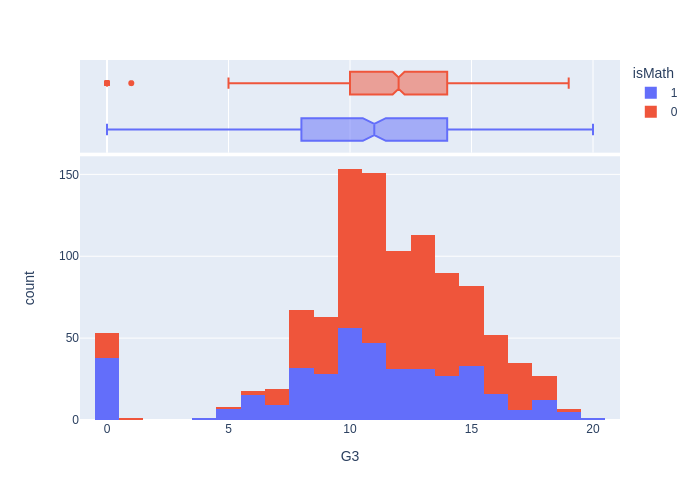

Firstly we made plots of the distributions over our target variable. We see that we have kind of class imbalance in this dataset since there is lack of 1-4 and 19+ classes. Also number of 5,6,7 is very small. This can indicate future problems with classification. For now, we don't transform our target variable, however in future it would be needed to dig deeper into drivers of grades so that better feature engineering might be constructed.

In [15]:
df_tmp = df[['famsize_LE3', 'studytime', 'freetime', 'health', 'G3', 'isMath']]
df_tmp['G3_LE10'] = df['G3'] <= 10
df_tmp.drop(['G3'], inplace=True, axis=1)
fig = px.parallel_categories(df_tmp, color="isMath", color_continuous_scale=px.colors.sequential.Inferno)
fig.write_image('parallel.png')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



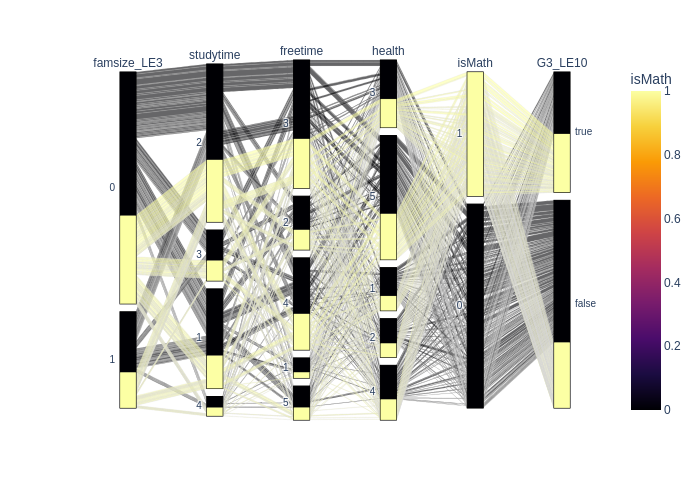

Here we see interesting plot of parallel categories. Firstly we split our target variable into 2 sets, those with values less/equal than 10 and those with higher. From that perspective we could conclude that there is imbalance of G3 across classes.

## Train Models

In [16]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

random_state = 42
ebm_search = [{}, {'learning_rate': 0.1, 'learning_rate': 0.001}]
lr_search = [{}]
xgb_search = [{}]

ebm_best = None
lr_best = None
xgb_best = None

ebm_best_score = 0
lr_best_score = 0
xgb_best_score = 0

param_search = {'EBM': ebm_search, 'RF': lr_search, 'XGB': xgb_search}
models = {'EBM': ExplainableBoostingClassifier, 'RF': LogisticRegression, 'XGB': XGBClassifier}
best_ckpts = {'EBM': ebm_best, 'RF': lr_best, 'XGB': xgb_best}
best_scores = {'EBM': ebm_best_score, 'RF': lr_best_score, 'XGB': xgb_best_score}

In [17]:
fn = lambda val: float(val)

In [18]:
y_train.value_counts()

G3
11    125
10    121
13     95
12     81
14     69
15     67
9      53
8      48
16     44
0      37
17     28
18     23
6      16
7      15
5       5
19      5
1       1
4       1
20      1
dtype: int64

## Selecting best model

In [19]:
for model_name in param_search.keys():
  print('Model name', model_name)  
  for params in param_search[model_name]:
    model = models[model_name](random_state=random_state, **params)
    if model_name == 'EBM':
      model.fit(X_train, y_train)
    else:
      model.fit(X_train, y_train.apply(float, axis=1))
    score = model.score(X_test, y_test)
    if score > best_scores[model_name] or best_ckpts[model_name] is None:
        best_ckpts[model_name] = model
        best_scores[model_name] = score

Model name EBM


/usr/local/lib/python3.7/dist-packages/interpret/glassbox/ebm/ebm.py:568: UserWarning:

Detected multiclass problem. Forcing interactions to 0. Multiclass interactions work except for global visualizations, so the line below setting interactions to zero can be disabled if you know what you are doing.

/usr/local/lib/python3.7/dist-packages/interpret/glassbox/ebm/ebm.py:568: UserWarning:

Detected multiclass problem. Forcing interactions to 0. Multiclass interactions work except for global visualizations, so the line below setting interactions to zero can be disabled if you know what you are doing.



Model name RF


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model name XGB


In [20]:
results = pd.DataFrame({'Model': ['EBM', 'RF', 'XGB'], 'Score': [best_scores['EBM'], best_scores['RF'], best_scores['XGB']]})
results

,Model,Score
0,EBM,0.191388
1,RF,0.210526
2,XGB,0.191388


Final results looks like follow.

EBM reference: https://interpret.ml/docs/ebm.html

# Homework 4 Task 1

Consider a following model:

f(x1, x2) = (x1 + x2)^2

Assume that x1, x2 ~ U[-1,1] and x1=x2 (full dependency)

Calculate PD profile for variable x1 in this model.

$E_{x2}f(X^{j|=z}) = E_{x2} (X+x_2)^2 = E_{x2} (x^2+2x_2x+x_2^2) = x^2 + 1/3$

# Homework 4 Task 2


# Ceteris Paribus


For the selected data set, train at least one tree-based ensemble model, e.g. random forest, gbdt, xgboost.
Done above

In [21]:
chosen_indices = list(range(5))
model = best_ckpts['RF']
test_subset, label = X_test.iloc[chosen_indices], y_test.iloc[chosen_indices]
preds = model.predict_proba(test_subset)

In [22]:
import dalex as dx
explainer = dx.Explainer(model, X_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 835 rows 40 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 835 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fe64d2ff200> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 1.61e-22, mean = 0.000757, max = 0.0522
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.00684, mean = 11.5, max = 20.0
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [23]:
X_test.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
13,15,4,3,2,2,0,5,4,3,1,...,1,0,0,1,1,0,1,1,1,0
839,16,3,4,3,2,0,3,4,5,1,...,1,0,0,0,0,0,0,1,0,0
657,17,1,4,4,1,1,5,5,4,1,...,0,1,0,1,0,0,1,1,1,0
914,16,2,1,2,2,0,5,2,1,1,...,1,0,0,0,0,1,1,1,1,0
998,18,4,2,1,2,0,5,3,1,1,...,1,0,0,0,0,1,1,1,1,1


In [24]:
cp_correct = explainer.predict_profile(new_observation=X_test.iloc[0])
fig = cp_correct.plot(variables=['age', 'absences'], show=False)
fig

Calculating ceteris paribus: 100%|██████████| 40/40 [00:00<00:00, 114.67it/s]


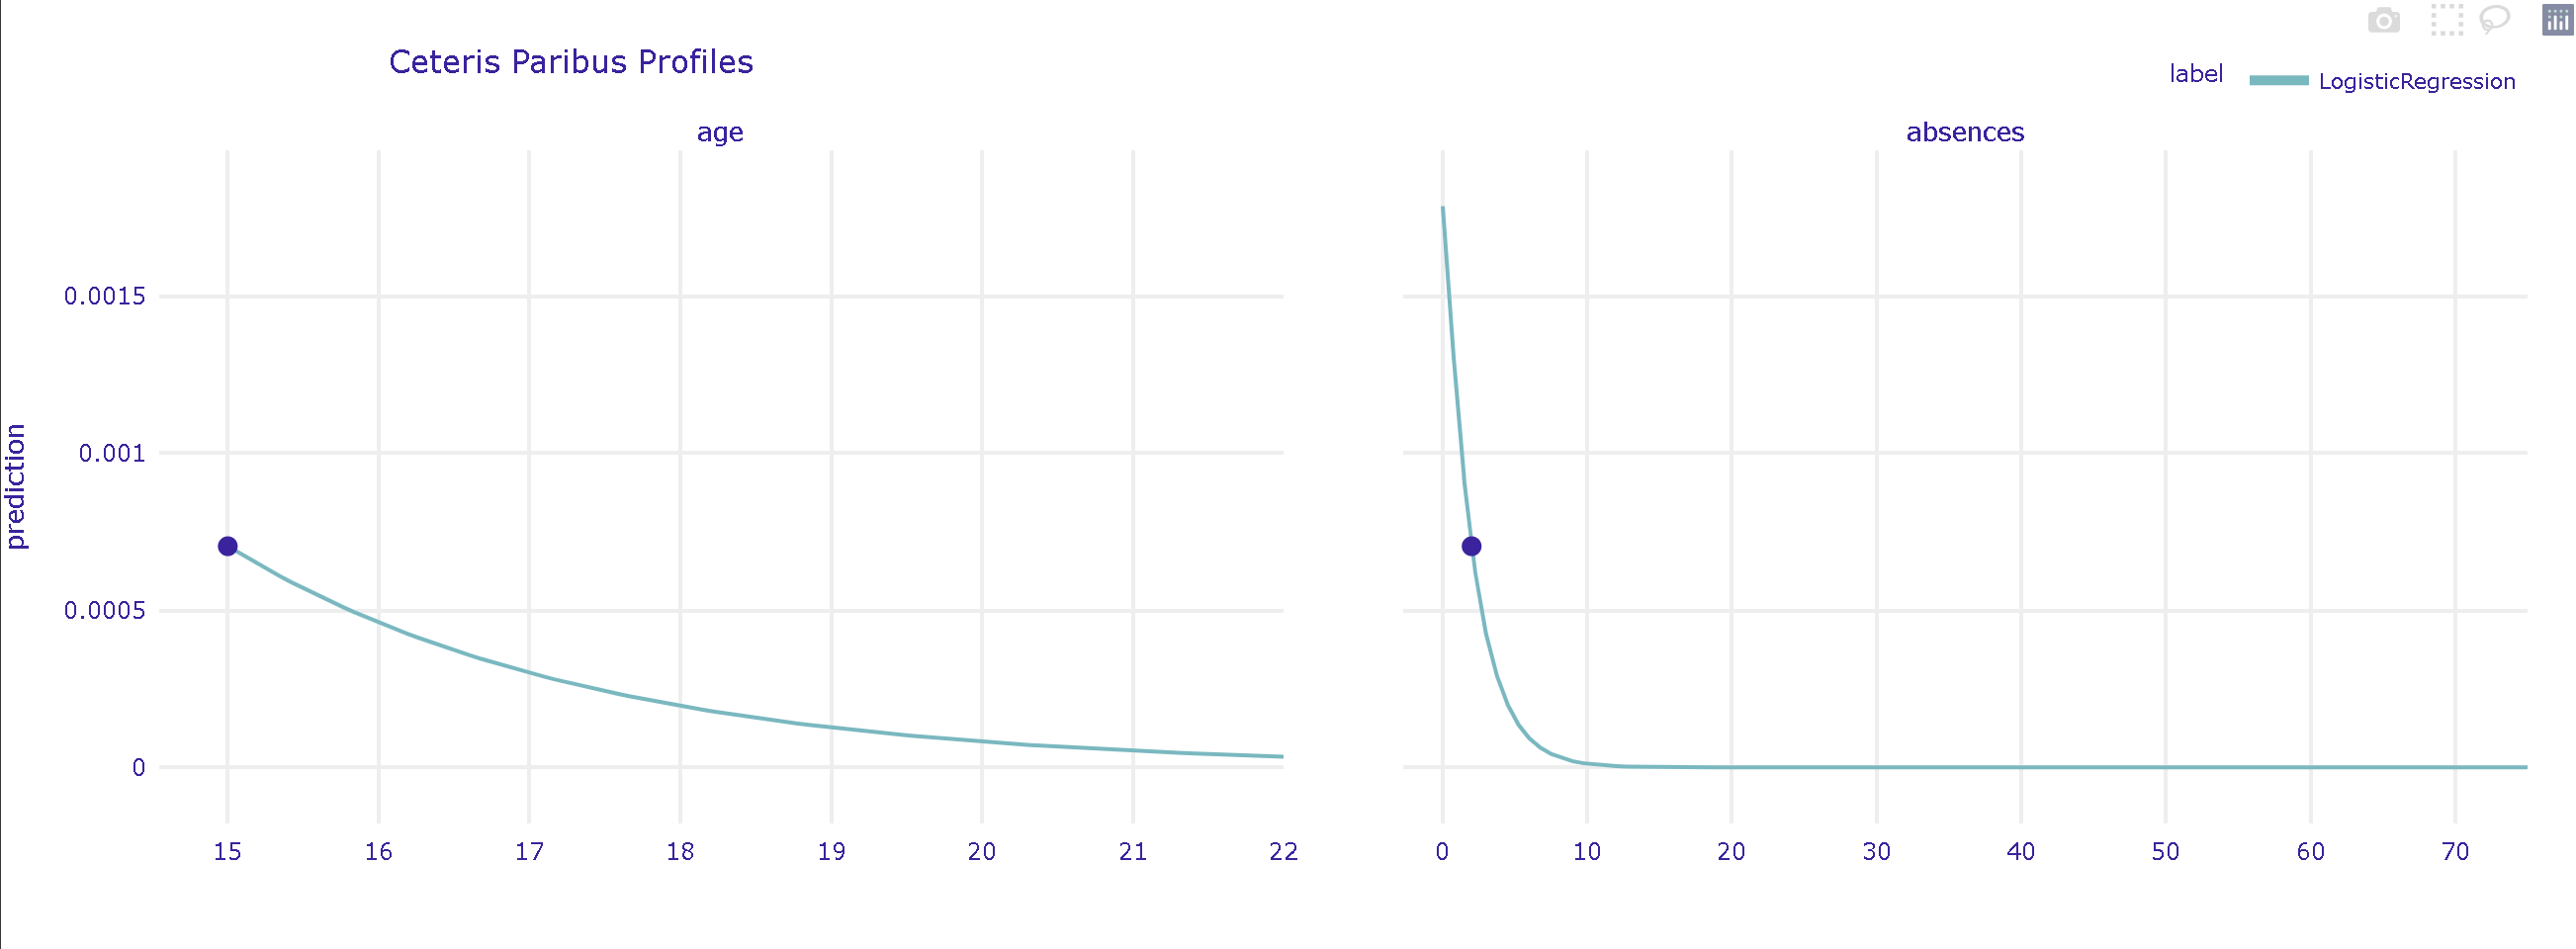

In [27]:
cp_correct = explainer.predict_profile(new_observation=X_test.iloc[2])
fig = cp_correct.plot(variables=['age', 'absences'], show=False)
fig

Calculating ceteris paribus: 100%|██████████| 40/40 [00:00<00:00, 64.77it/s]


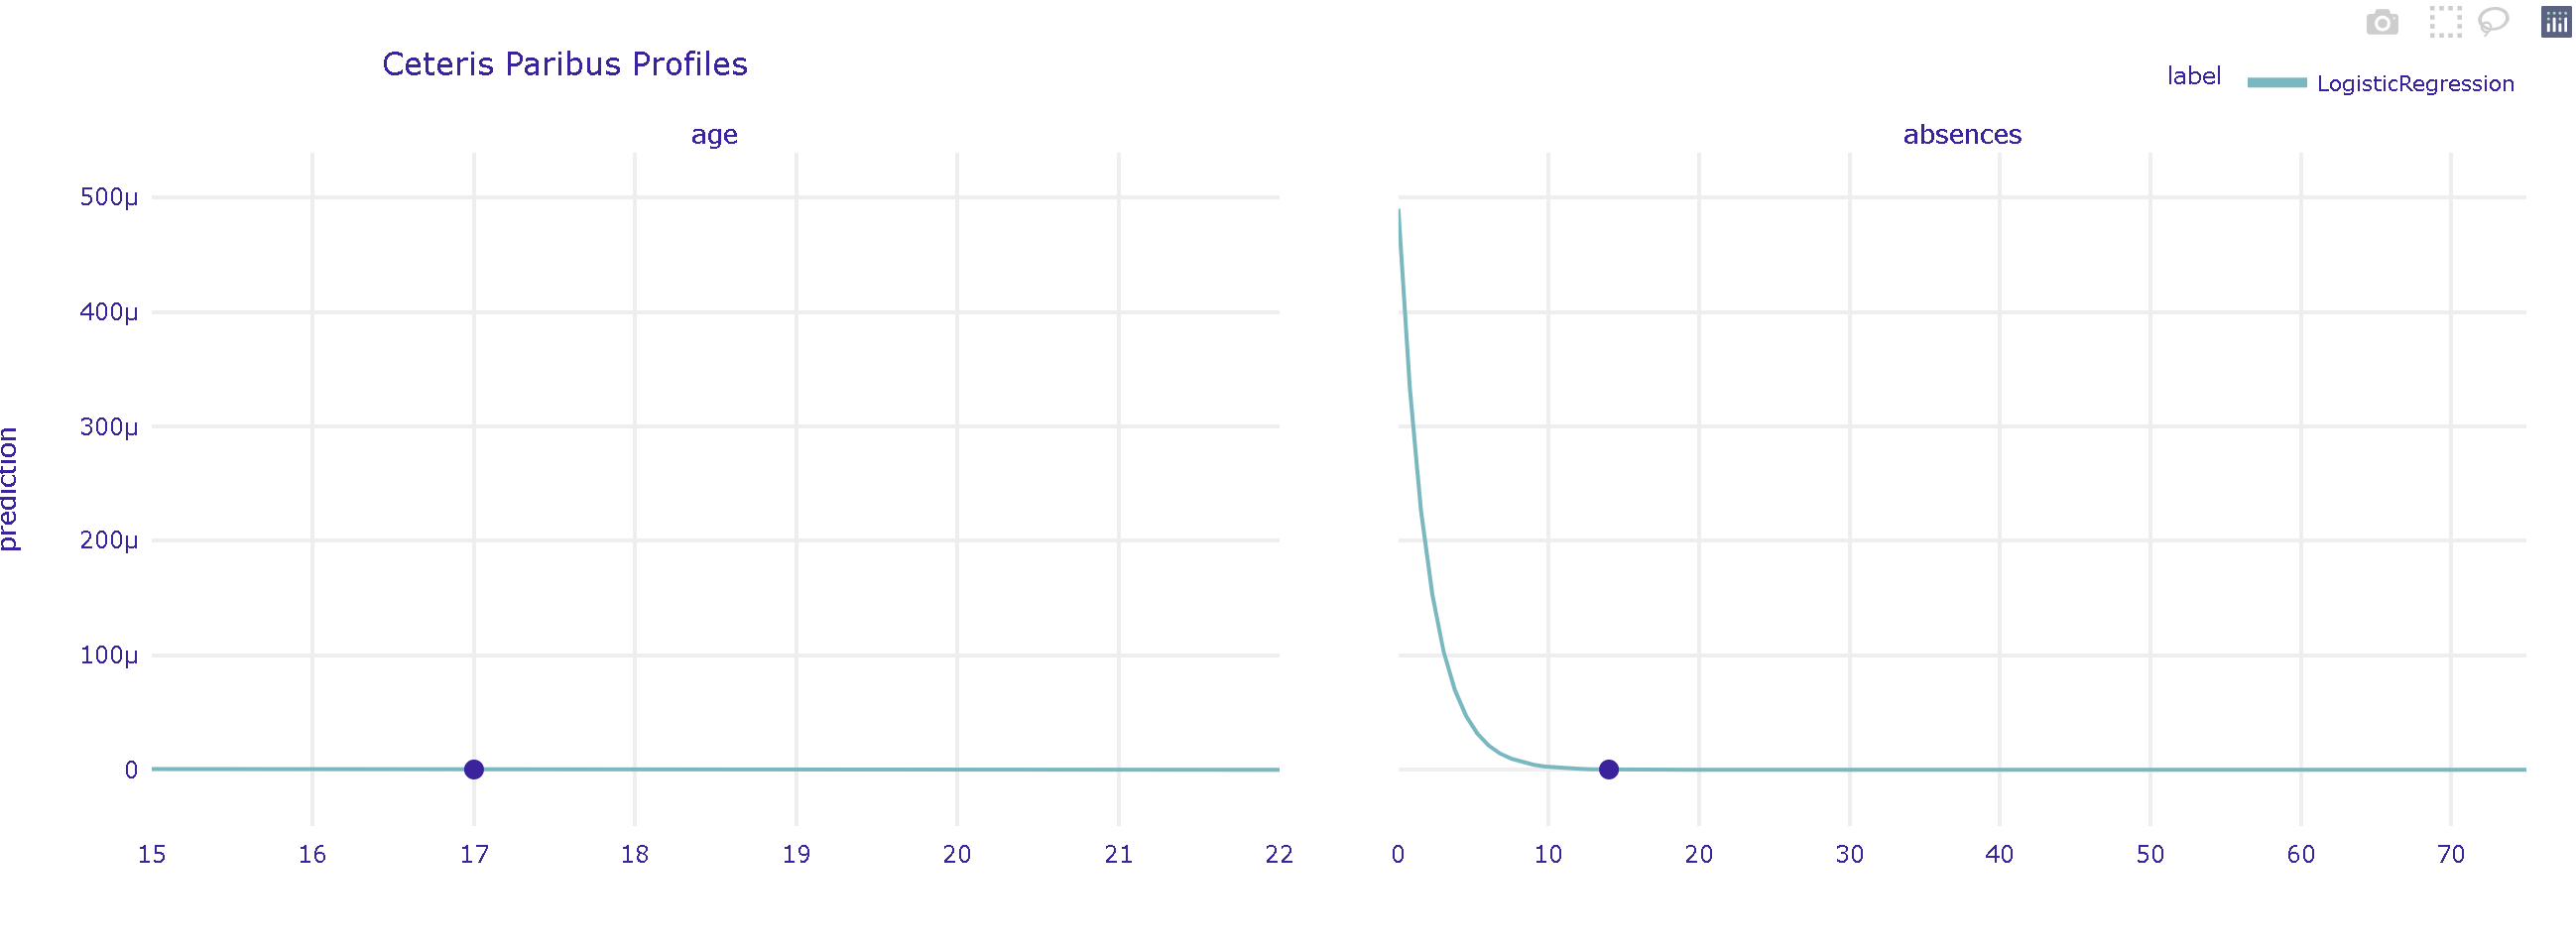

In the exampls above we seen that for those 2 points from datasets, there have different profiles. What we do here is

"Methods that will be discussed today correspond to panel A – tracing model response along changes in a single variable to get some understanding about black-box model behavior around  x"

Results above indicated that for second example, no matther what age has noi influence on our prediction. For the first one we see that age is a signifficant factor. It is quite obvioius but meaningful too that touple of values can have such a big impact on a values of other variable.


# Partial Dependence

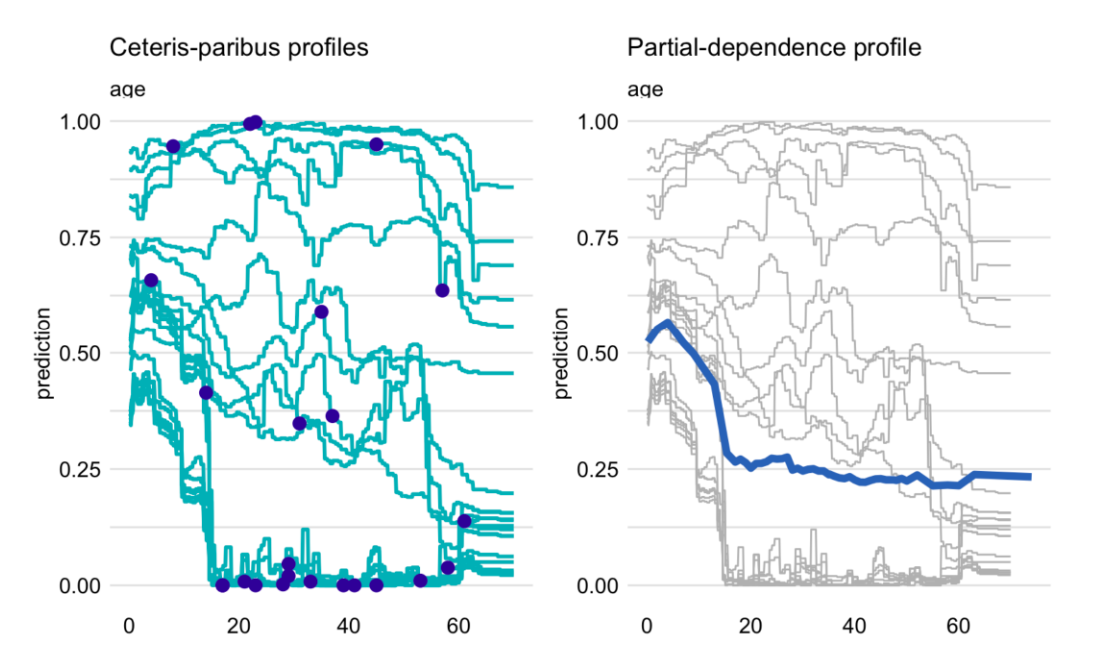

In [29]:
pdp = explainer.model_profile() 
# pdp.plot(variables=["age", "absences"], geom="profiles", title="Partial Dependence Plot with individual profiles")

Calculating ceteris paribus: 100%|██████████| 40/40 [00:05<00:00,  7.28it/s]


In [31]:
pdp.plot(variables=["age", "absences"])

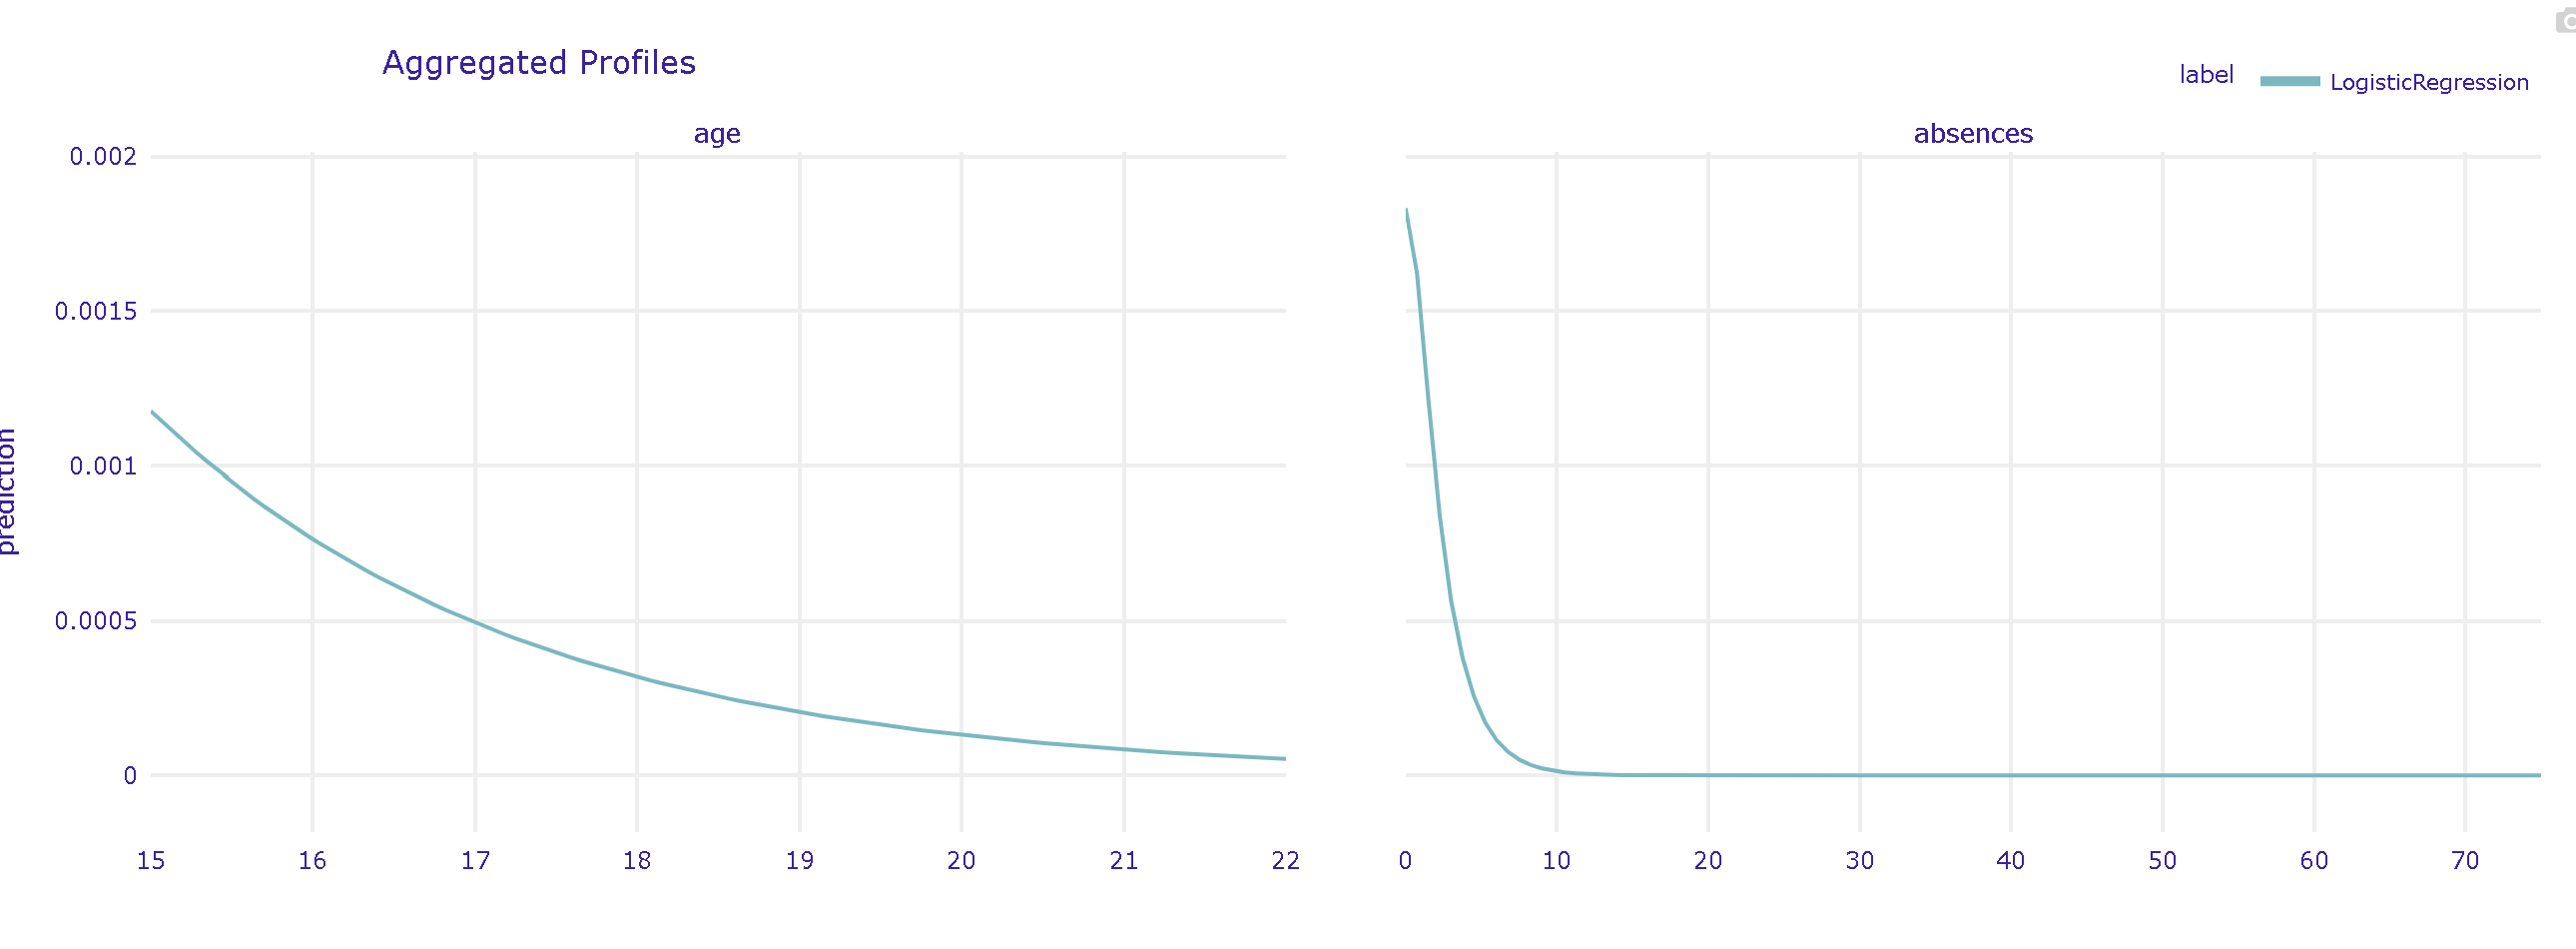

We see that partial dependence plot is more like averaged. So that we can conclude that it more or less approximates general trends however if variance for profiles will be very high, it can introduce false resultats

In [32]:
explainer_ebm = dx.Explainer(best_ckpts['EBM'], X_train, y_train)
pdp = explainer.model_profile() 
pdp.plot(variables=["age", "absences"])

Preparation of a new explainer is initiated

  -> data              : 835 rows 40 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 835 values
  -> model_class       : interpret.glassbox.ebm.ebm.ExplainableBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fe64d2ff200> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 9.75e-06, mean = 0.00128, max = 0.375
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.00702, mean = 11.5, max = 20.0
  -> model_info        : package interpret

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 40/40 [00:03<00:00, 11.17it/s]


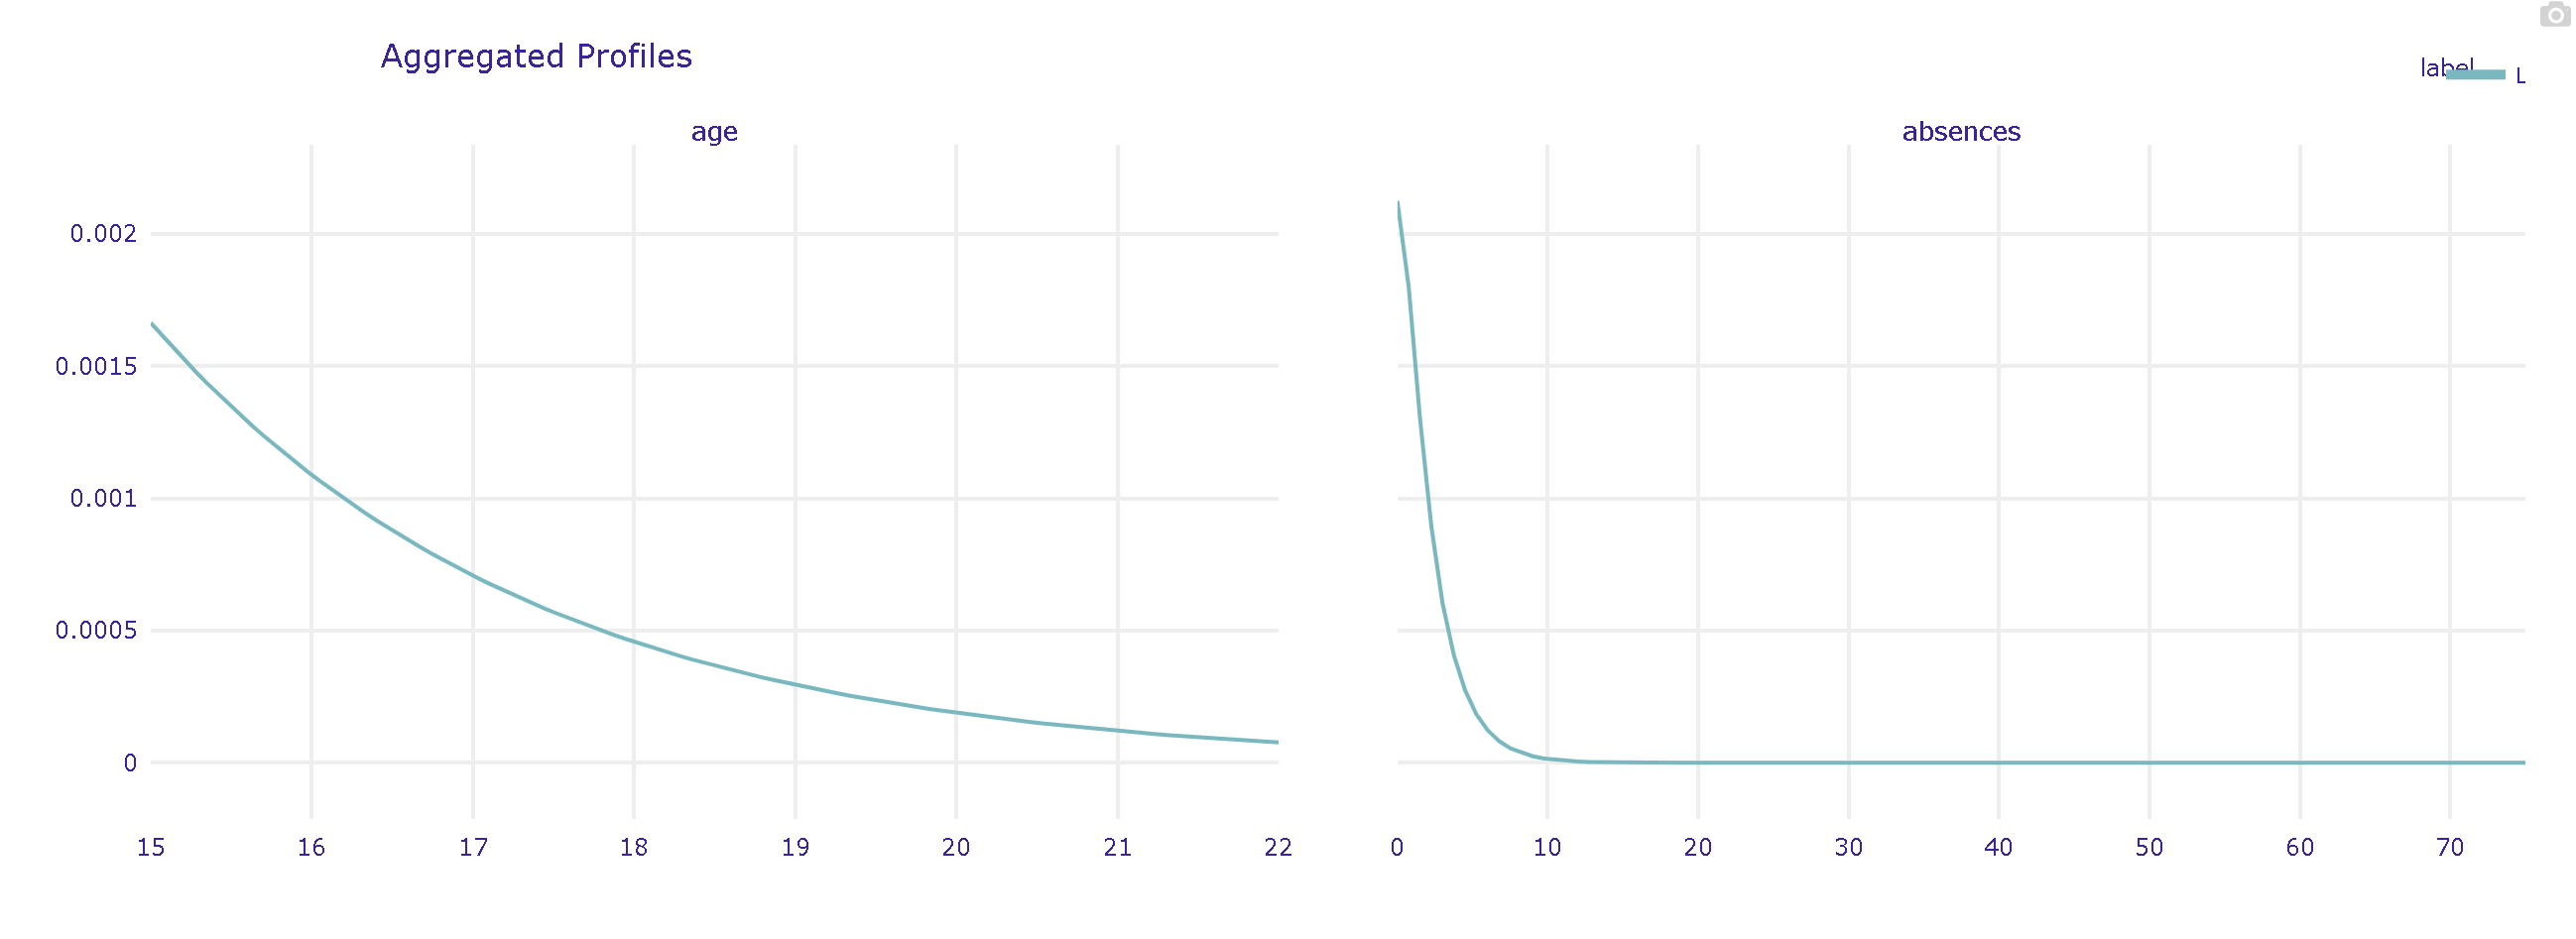

In [33]:
explainer_ebm = dx.Explainer(best_ckpts['XGB'], X_train, y_train)
pdp = explainer.model_profile() 
pdp.plot(variables=["age", "absences"])

Preparation of a new explainer is initiated

  -> data              : 835 rows 40 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 835 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fe64d2ff200> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.000277, mean = 0.00183, max = 0.277
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0104, mean = 11.5, max = 20.0
  -> model_info        : package xgboost

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 40/40 [00:03<00:00, 11.35it/s]


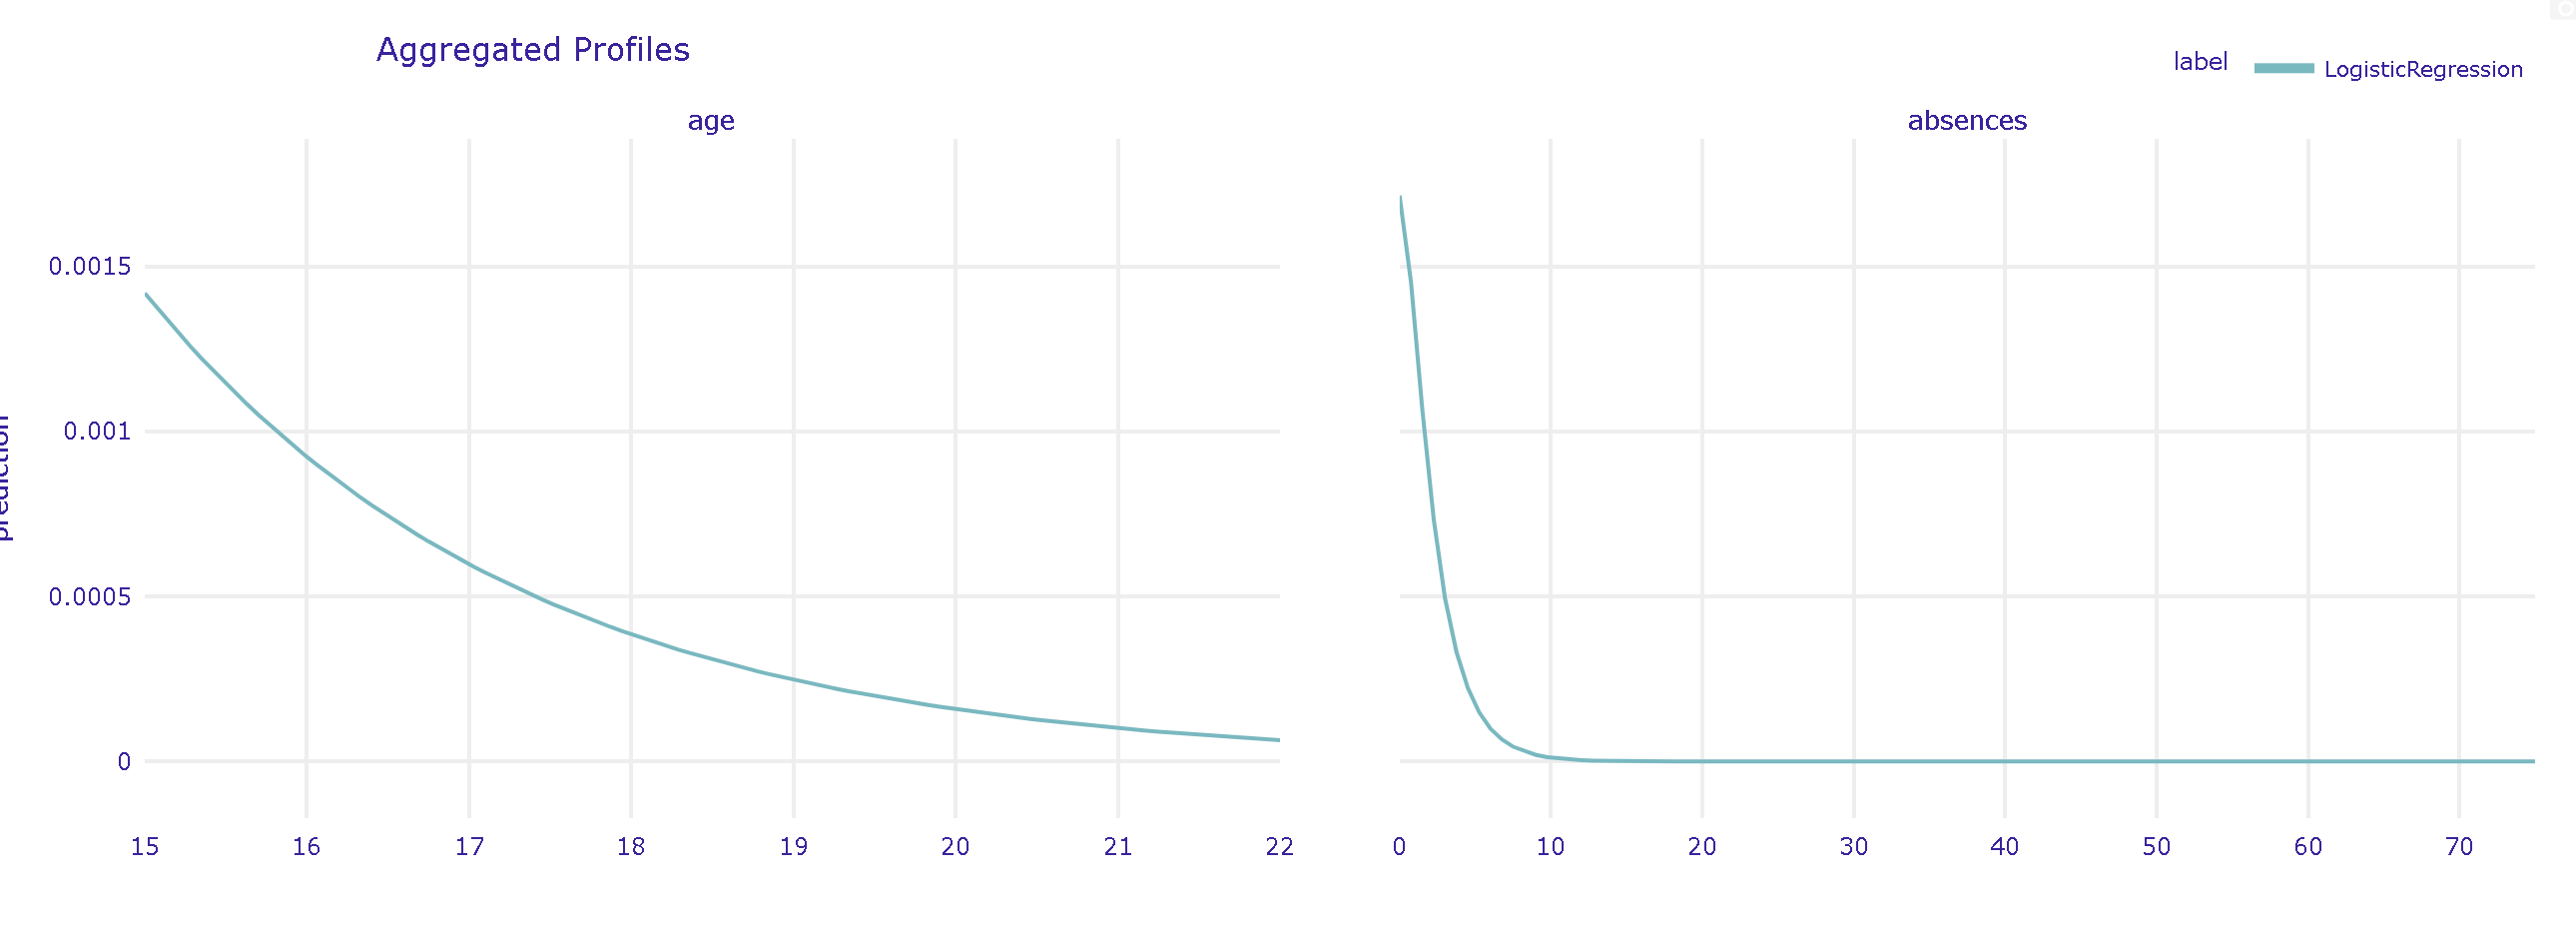

We have compared 3 models for this problem. Partial Depence plots look very similar. It can indicate that more or less model profiles on this dataset and those which we used - at average - converge to similar result. It might be interesting to compare it on other - maybe not tree-like or boosting like models. 